In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from scipy import stats
from IPython.display import Math, Latex, display

plt.rcParams.update({"figure.dpi": 150})

In [2]:
def as_si(x, ndp):
    s = "{x:0.{ndp:d}e}".format(x=x, ndp=ndp)
    m, e = s.split("e")
    return r"{m:s} \times 10^{{{e:d}}}".format(m=m, e=int(e))

# 4.1.1/4.1.2 Геометрическая оптика
Формула плоской линзы: $$ \frac{1}{a} + \frac{1}{b} = \frac{1}{f} = D $$
Где $a$ - расстояние от предмета до линзы, $b$ расстояние от предмета до изображения, $f$ - фокусное расстояние линзы, $D$ - оптическая сила линзы.

Тогда при $a$ = $f$ изображение будет в бесконечности.
### Метод Бесселя
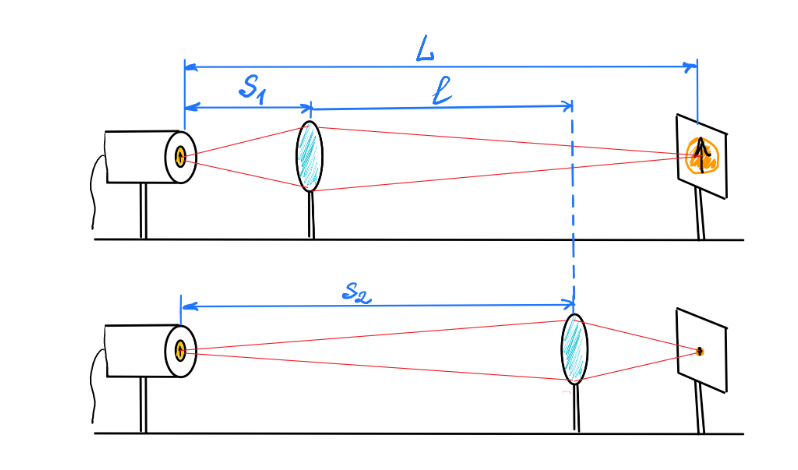

Формула Бесселя: $$ \frac{L^2 - l^2}{4L} $$
### Метод Аббе

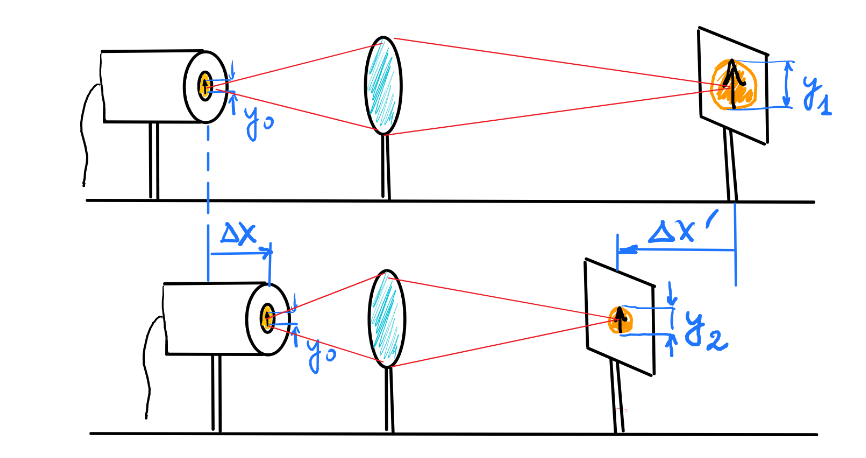

$$ f = \frac{\Delta x'}{y_1/y_0-y_2/y_0} = \frac{\Delta x}{y_0/y_2-y_0/y_1} \Rightarrow f^2 = \Delta x \Delta x' \frac{y_2y_1}{(y_2-y_1)^2} $$

### Микроскоп

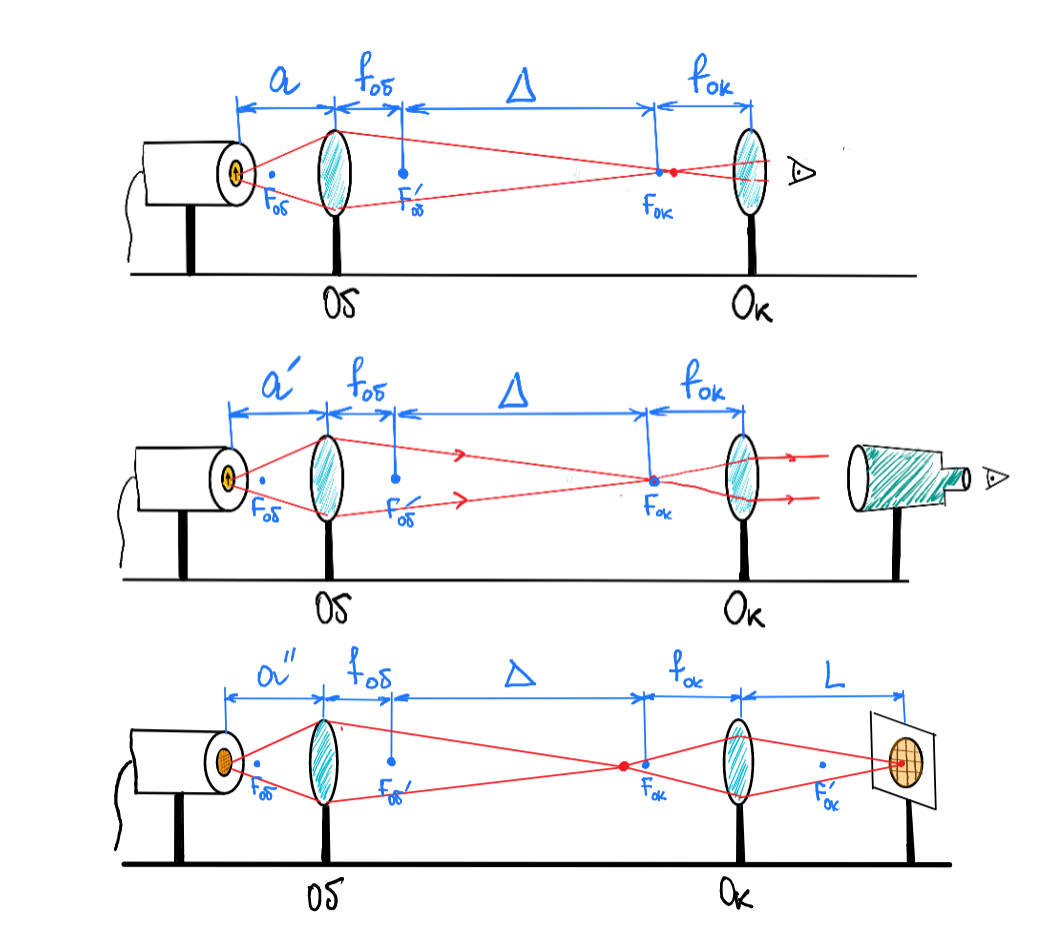

Угловое увеличение микроскопа при аккомодации глаза на бесконечность: $$ \gamma_\infty = \frac{y_1/f_{\text{ок}}}{y_0/L_{\text{зр}}} = \frac{L_\text{зр}\Delta}{f_\text{ок}f_\text{об}} $$

Угловое увеличение микроскопа при аккомодации глаза на бесконечность: $$ \gamma_\text{зр} = \frac{y_2/f_{\text{ок}}}{y_0/L_\text{зр}} = \frac{(L_\text{зр} + f_\text{ок})\Delta}{f_\text{ок}f_\text{об}} $$

Для проекционного: $$ \gamma_\text{пр} = \frac{(L - f_\text{ок})\Delta}{f_\text{ок}f_\text{об}} $$
где $L$ - расстояние от окуляра до экрана.

### Составная оптическая система
$$ \frac{1}{f_1} + \frac{1}{f_2} + \frac{l}{f_1f_2} = \frac{1}{f} $$ где $l$ - расстояние между линзами.

In [9]:
e1t1 = pd.read_csv("e1t1(1).csv")
e1t1["$f$ мм"] = (e1t1["$f_1$ мм"] + e1t1["$f_2$ мм"])/2
e1t1["$\Delta$ мм"] = np.abs(e1t1["$f_1$ мм"] - e1t1["$f_2$ мм"])
# e1t1_styler = (
#     e1t1
#     .transpose()
#     .style.format(formatter="{:.1f}", subset=pd.IndexSlice[["Линза", "$f$ мм"], :])
#     .format(formatter="{:.0f}", subset=pd.IndexSlice[["$f_1$ мм", "$f_2$ мм", "$\Delta$ мм"], :])
#     .hide(axis="columns")
# )
# e1t1_styler
print(e1t1.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  Линза &  \$f\_1\$ мм &  \$f\_2\$ мм &  \$f\$ мм &  \$\textbackslash Delta\$ мм \\
\midrule
0 &    6.1 &        80 &        83 &    81.5 &            3 \\
1 &    6.2 &       130 &       132 &   131.0 &            2 \\
2 &    6.3 &       183 &       179 &   181.0 &            4 \\
3 &    6.4 &       257 &       252 &   254.5 &            5 \\
\bottomrule
\end{tabular}



C:\Users\timbe\AppData\Local\Temp\ipykernel_18672\3971262315.py:12: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(e1t1.to_latex())


Для линзы 6.1:

In [12]:
e1t2 = pd.read_csv("./data/e1t2.csv")
f = e1t2["f"].mean()
df = e1t2["f"].std()
display(
    Math(r"f  = (" + as_si(f, 2) + r"\pm" + as_si(df, 1) + r")\text{ мм}")
)

<IPython.core.display.Math object>

Для рассеивающей:

In [11]:
l = 197
a_0 = 290
f = l - a_0
df = 5
display(
    Math(r"f = l - a_0 = (" + as_si(f, 2) + r"\pm" + as_si(df, 1) + r")\text{ мм}")
)

<IPython.core.display.Math object>

Метод Бесселя для 6.2:

In [12]:
e2t1 = pd.read_csv("e2t1 (2).csv")
s_1 = 181
s_2 = 430
e2t1["$l$ мм"] = e2t1["$s_2$ мм"] - e2t1["$s_1$ мм"]
L = 600
print(e2t1.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  \$s\_1\$ мм &  \$s\_2\$ мм &  \$l\$ мм \\
\midrule
0 &       181 &       430 &     249 \\
1 &       180 &       423 &     243 \\
\bottomrule
\end{tabular}



C:\Users\timbe\AppData\Local\Temp\ipykernel_18672\501147924.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(e2t1.to_latex())


In [23]:
e2t1["$f$ мм (по формуле тонкой линзы)"] = 1/(1/e2t1["$s_1$ мм"] + 1/(L - e2t1["$s_1$ мм"]))

In [25]:
e2t1["$f$ мм (по методу Бесселя)"] = (L**2 - e2t1["$l$ мм"]**2)/(4*L)

In [26]:
e2t1_styler = (
    e2t1
    .transpose()
    .style#.format(formatter="{:.1f}", subset=pd.IndexSlice[["Линза", "$f$ мм"], :])
    #.format(formatter="{:.0f}", subset=pd.IndexSlice[["$f_1$ мм", "$f_2$ мм", "$\Delta$ мм"], :])
    .hide(axis="columns")
)
e2t1_styler

$s_1$ мм,181.000000,180.000000
$s_2$ мм,430.000000,423.000000
$l$ мм,249.000000,243.000000
$f$ мм (по формуле тонкой линзы),126.398333,126.000000
$f$ мм (по методу Бесселя),124.166250,125.396250


Метод Абби:

In [28]:
y_0 = 20
y_1 = 72
y_2 = 46
dx = 20
dxp = 160
f_1 = dxp / (y_1 / y_0 - y_2/y_0)
f_2 = dx / (y_0 / y_2 - y_0/y_1)
display(
    Math(r"f = \frac{\Delta x}{y_0/y_2 - y_0/y_1} = (" + as_si(f_2, 2) + r"\pm" + as_si(df, 1) + r")\text{ мм}")
)
display(
    Math(r"f = \frac{\Delta x'}{y_1/y_0 - y_2/y_1} = (" + as_si(f_1, 2) + r"\pm" + as_si(df, 1) + r")\text{ мм}")
)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [29]:
f_k = 254
D_ob = 8
D_ok = 16

In [30]:
L = 380
y_1 = 45
y_0 = 20

In [ ]:
l = 53
F = 160
